### Libraries

In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

### Signals $x[n]$

In [2]:
N = 8192

# Audio Signal
u1, fs = sf.read('audios/ton2.wav')

# Cosine Signal
x = np.cos(2*np.pi*1000*np.arange(N)/44100)

### Window $w[n]$ (Blackman)

In [3]:
w = np.blackman(N)
w = (N*w) / w.sum()

f = (np.arange(N/2)/N)*fs

### Windowing the time signals

In [4]:
# Windowed cosine
x_windowed = x*w

# Windowed audio signal
u1_windowed = u1[0:N]*w

### Plots

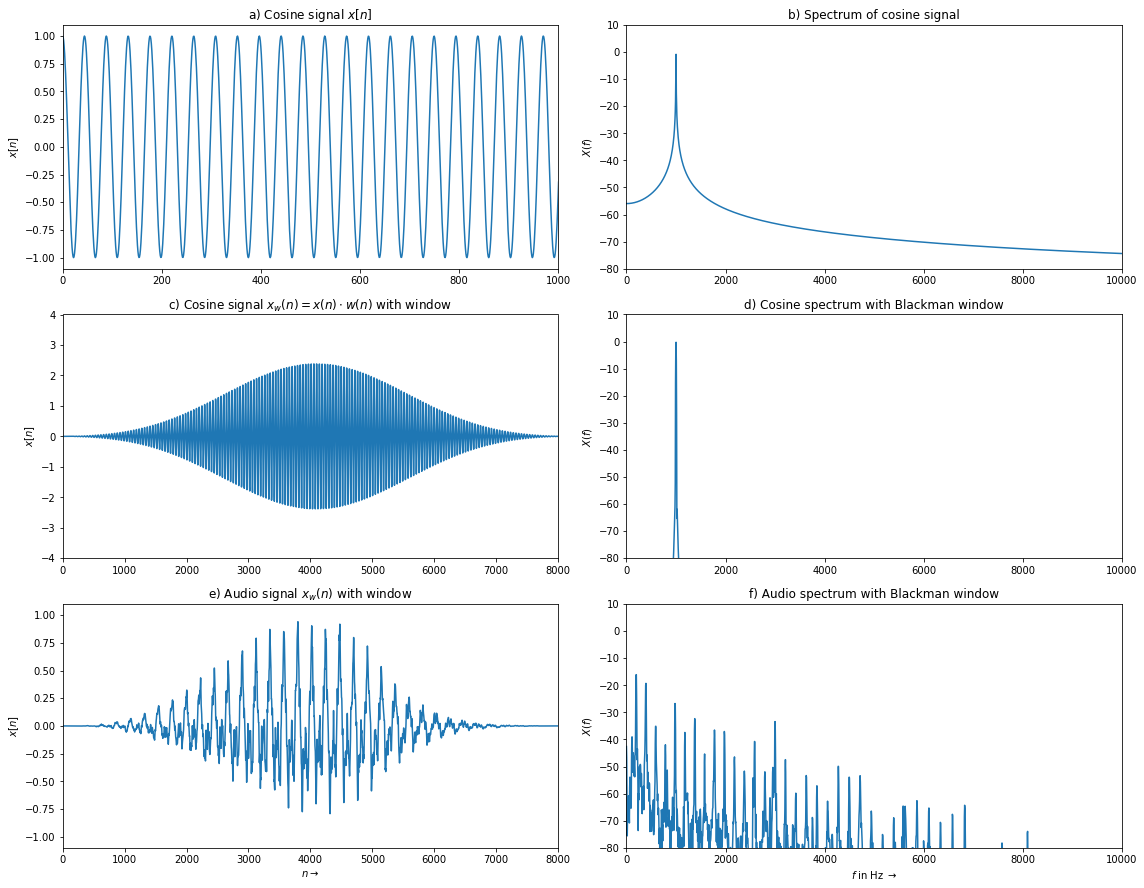

In [5]:
plt.figure(figsize=(16, 16))

# Cosine Signal
plt.subplot(421)
plt.plot(range(N), x)
plt.axis(ymin = -1.1, ymax = 1.1, xmin = 0, xmax = 1000)
plt.ylabel('$x[n]$')
plt.title('a) Cosine signal $x[n]$');


# Cosine Spectrum
X = 20 * np.log10(np.abs(np.fft.fft(x))/(N/2))
plt.subplot(422)
plt.plot(f,X[0:N//2])
plt.axis(ymin = -80, ymax = 10, xmin = 0, xmax = 10000)
plt.ylabel('$X(f)$');
plt.title('b) Spectrum of cosine signal')
plt.tight_layout()


# Windowed Cosine
plt.subplot(423)
plt.plot(range(N), x_windowed)
plt.axis(ymin = -4, ymax = 4, xmin = 0, xmax = 8000)
plt.ylabel('$x[n]$')
plt.title('c) Cosine signal $x_w(n)=x(n) \cdot w(n)$ with window')
plt.tight_layout()


# Windowed cosine spectrum
X_windowed = 20 * np.log10(np.abs(np.fft.fft(x_windowed))/(N/2))
plt.subplot(424)
plt.plot(f,X_windowed[0:N//2])
plt.axis(ymin = -80, ymax = 10, xmin = 0, xmax = 10000)
plt.ylabel('$X(f)$');
plt.title('d) Cosine spectrum with Blackman window')
plt.tight_layout()


# Windowed audio signal 
plt.subplot(425)
plt.plot(range(N),u1_windowed)
plt.axis(ymin = -1.1, ymax = 1.1, xmin = 0, xmax = 8000)
plt.xlabel(r'$n \rightarrow $')
plt.ylabel('$x[n]$')
plt.title('e) Audio signal $x_w(n)$ with window')
plt.tight_layout()


# Windowed audio spectrum
U1_windowed = 20 * np.log10(np.abs(np.fft.fft(u1_windowed))/(N/2))
plt.subplot(426)
plt.plot(f,U1_windowed[0:N//2])
plt.axis(ymin = -80, ymax = 10, xmin = 0, xmax = 10000)
plt.xlabel(r'$f$ in Hz $\rightarrow $')
plt.ylabel('$X(f)$');
plt.title('f) Audio spectrum with Blackman window');
plt.tight_layout()

plt.savefig("figures/figure1_18.jpg", dpi=600, bbox_inches='tight')